In [2]:
'''
Linear Regression 使用時機:
1. 標籤(y)為連續值
2. 資料量較少
3. 假設資料特徵和標籤之間有線性關係

透過 Feature Transformation and Normalization 幫助快速收斂

Regression:
1. Mean Absolute Error
2. Root Mean Absolute Error
3. R2 Score

Classification:
1. Accuracy
2. F1 Score
'''

'\nLinear Regression 使用時機:\n1. 標籤(y)為連續值\n2. 資料量較少\n3. 假設資料特徵和標籤之間有線性關係\n\n透過 Feature Transformation and Normalization 幫助快速收斂\n\nRegression:\n1. Mean Absolute Error\n2. Root Mean Absolute Error\n3. R2 Score\n\nClassification:\n1. Accuracy\n2. F1 Score\n'

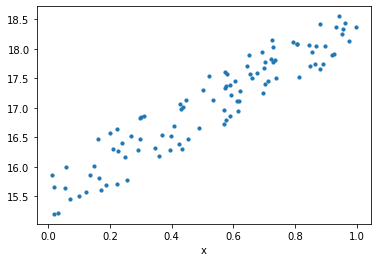

In [3]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
noise=np.random.rand(100,1)
x=np.random.rand(100,1)
y=3*x+15+noise

plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.show()

In [4]:
'''
Linear Regression

Parameters:
fit_intercept: 是否有截距，如果沒有直接過原點

Attributes:
coef_: 取得斜率
intercept_: 取得截距

Methods:
fit: 放入x,y進行模型擬合
predict: 預測並回傳預測類別
score: R2 score 模型評估
'''

'\nLinear Regression\n\nParameters:\nfit_intercept: 是否有截距，如果沒有直接過原點\n\nAttributes:\ncoef_: 取得斜率\nintercept_: 取得截距\n\nMethods:\nfit: 放入x,y進行模型擬合\npredict: 預測並回傳預測類別\nscore: R2 score 模型評估\n'

In [5]:
from sklearn.linear_model import LinearRegression

linearModel=LinearRegression(fit_intercept=True)
linearModel.fit(x,y)
predicted=linearModel.predict(x)

In [6]:
'''
模型評估
scikit-learn 決策樹回歸模型的score函式是R2 score，可作為模型評估依據，其數值越接近於1代表模
'''

'\n模型評估\nscikit-learn 決策樹回歸模型的score函式是R2 score，可作為模型評估依據，其數值越接近於1代表模\n'

In [8]:
from sklearn import metrics
print('R2 score: ', linearModel.score(x,y))
mse= metrics.mean_squared_error(y,predicted)
print('MSE score: ', mse)

R2 score:  0.888257994980688
MSE score:  0.0827545781222876


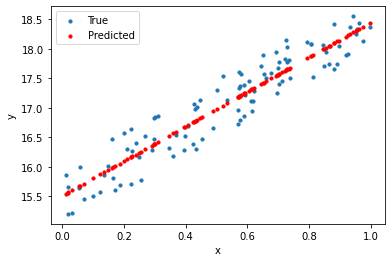

In [10]:
plt.scatter(x,y,s=10,label=True)
plt.scatter(x,predicted,color='r',s=10,label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [13]:
coef=linearModel.coef_
intercept=linearModel.intercept_

print('slope a=',coef[0][0])
print('intercept b=',intercept[0])

slope a= 2.9311233545408935
intercept b= 15.509166339414463


In [15]:
rng=np.random.RandomState(1)
x=10*rng.rand(100,3)
y=0.5+np.dot(x,[1.5,-1.,2.])

In [16]:
linearModel.fit(x,y)
pred=linearModel.predict(x)
print(linearModel.intercept_)
print(linearModel.coef_)

0.5000000000000142
[ 1.5 -1.   2. ]


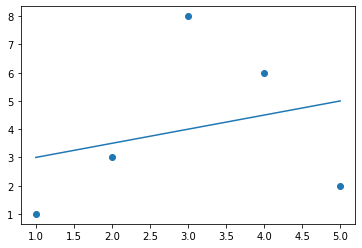

In [19]:
x=np.array([1,2,3,4,5])
y=np.array([1,3,8,6,2])
x=x[:,np.newaxis]
model=LinearRegression()
model.fit(x,y)
yfit=model.predict(x)
plt.scatter(x,y)
plt.plot(x,yfit)

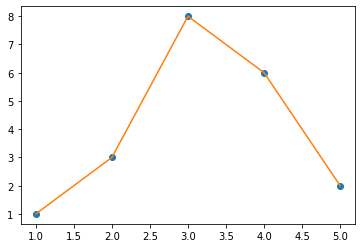

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))
ypred=PolynomialRegression(degree=4).fit(x,y).predict(x)
plt.plot(x,y,'o')
plt.plot(x,ypred)

In [43]:

#randomly define new value of x,y
def make_data(N,err=1,rseed=42):
    rng=np.random.RandomState(rseed)
    x=rng.rand(N,1)**2
    y=10-1/(x.rave()+0.1)
    if err>0:
        y+=err*rng.randn(N)
    return x,y


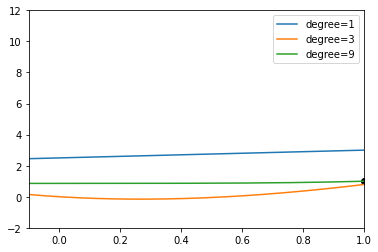

In [58]:
#test data set
x_test=np.linspace(-0.1,1.1,500)[:,None]
plt.scatter(x.ravel(),y,color='black')
#test the degree of 1,3,9
for degree in [1,3,9]:
    y_test=PolynomialRegression(degree).fit(x,y).predict(x_test)
    plt.plot(x_test.ravel(), y_test, label='degree={}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')